# Preprocessing and Training

### **Data preprocessing and model training for CSV**
1. Load gene expression matrix and sample time information.

In [ ]:
# %%
import pandas as pd
import scanpy as sc
import numpy as np
from anndata import AnnData

# Load the gene expression matrix and sample time information from a CSV file.
df = pd.read_csv('/lustre/home/2501111653/DeepRUOTv2_test_data/data/simulation_gene.csv')

# Create an observation DataFrame to store sample information.
obs = pd.DataFrame(index=df.index)
obs['samples'] = df['samples'].values

# Extract the gene expression matrix by dropping the 'samples' column.
X = df.drop(columns=['samples']).values

# Create an AnnData object from the gene expression matrix and observation DataFrame.
adata = AnnData(X=X, obs=obs)

# Save the AnnData object to an H5AD file for further analysis.
adata.write_h5ad('data/simulation_gene.h5ad')

2. Preprocess the data and train the model using the `ruot_simulation_gene` configuration.

In [3]:
import CytoBridge as cb

# Preprocess the data with specified parameters.
adata = cb.pp.preprocess(adata, time_key='samples', dim_reduction='none', normalization=False, log1p=False, select_hvg=False)

# Train the model using the specified configuration and device.
adata = cb.tl.fit(adata, config='ruot_simulation_gene', device='cuda')


Using 'samples' as the time point identifier.
No time mapping provided. Generating automatic mapping.
Automatically generated time mapping: {0.0: 0, 1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4}
Numerical time points stored in `adata.obs['time_point_processed']`.
Preprocessing recipe finished.
Loading built-in config: 'ruot_simulation_gene'

--- Starting Stage: Pretrain ---
  Mode: neural_ode, Epochs: 100, Use Score: False

====  Pretrain  ====
--------------------------------------------------
--------------------------------------------------
  No scheduler parameters configured - keeping learning rate constant
  velocity_net     grad=True
  growth_net       grad=True
  score_net        grad=False
  Optimizer parameters (shapes): [torch.Size([400, 3]), torch.Size([400]), torch.Size([400, 400]), torch.Size([400]), torch.Size([2, 400]), torch.Size([2]), torch.Size([400, 3]), torch.Size([400]), torch.Size([400, 400]), torch.Size([400]), torch.Size([1, 400]), torch.Size([1])]
  Stage 'Pretrain', Epoch

Computing UOT plans...:   0%|          | 0/4 [00:00<?, ?it/s]

Final entropic reg selected: 0.051000000000000004


Computing UOT plans...:  25%|██▌       | 1/4 [00:01<00:04,  1.62s/it]

Elbow rule selected reg_m: 1.125336
Time step 0 chunk 0 (per_time): reg=0.051000000000000004, reg_m=1.1253355826007645
Time step 0 chunk: scaled reg_m = 1.1253355826007645
Final entropic reg selected: 0.051000000000000004


Computing UOT plans...:  50%|█████     | 2/4 [00:03<00:03,  1.79s/it]

Elbow rule selected reg_m: 1.359356
Time step 1 chunk 0 (per_time): reg=0.051000000000000004, reg_m=1.3593563908785256
Time step 1 chunk: scaled reg_m = 1.3593563908785256
Final entropic reg selected: 0.051000000000000004


Computing UOT plans...:  75%|███████▌  | 3/4 [00:05<00:02,  2.03s/it]

Elbow rule selected reg_m: 0.931603
Time step 2 chunk 0 (per_time): reg=0.051000000000000004, reg_m=0.9316027658125524
Time step 2 chunk: scaled reg_m = 0.9316027658125524
Final entropic reg selected: 0.051000000000000004
Elbow rule selected reg_m: 6.162311
Time step 3 chunk 0 (per_time): reg=0.051000000000000004, reg_m=6.1623106765027
Time step 3 chunk: scaled reg_m = 6.1623106765027


Flow matching: 100%|██████████| 3000/3000 [00:34<00:00, 86.44it/s]


  Best model (loss=0.7355) saved → /home/sjt/workspace2/CytoBridge_test-main_crufm/results/experiment_simulation/Train_FM/best_model.pth

--- Starting Stage: Finetune ---
  Mode: neural_ode, Epochs: 500, Use Score: False

====  Finetune  ====
--------------------------------------------------
--------------------------------------------------
  No scheduler parameters configured - keeping learning rate constant
  velocity_net     grad=True
  growth_net       grad=True
  score_net        grad=False
  Optimizer parameters (shapes): [torch.Size([400, 3]), torch.Size([400]), torch.Size([400, 400]), torch.Size([400]), torch.Size([2, 400]), torch.Size([2]), torch.Size([400, 3]), torch.Size([400]), torch.Size([400, 400]), torch.Size([400]), torch.Size([1, 400]), torch.Size([1])]
  Stage 'Finetune', Epoch 1/500, Loss: 1.0074
[INFO] Epoch   0 has a lower loss| all_loss 1.0074
[INFO] Epoch   1 has a lower loss| all_loss 0.6438
[INFO] Epoch   2 has a lower loss| all_loss 0.6264
[INFO] Epoch   3 h

3. Plot the growth rate of the data.

[plot_growth] saved to -> /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/g_values_plot.svg


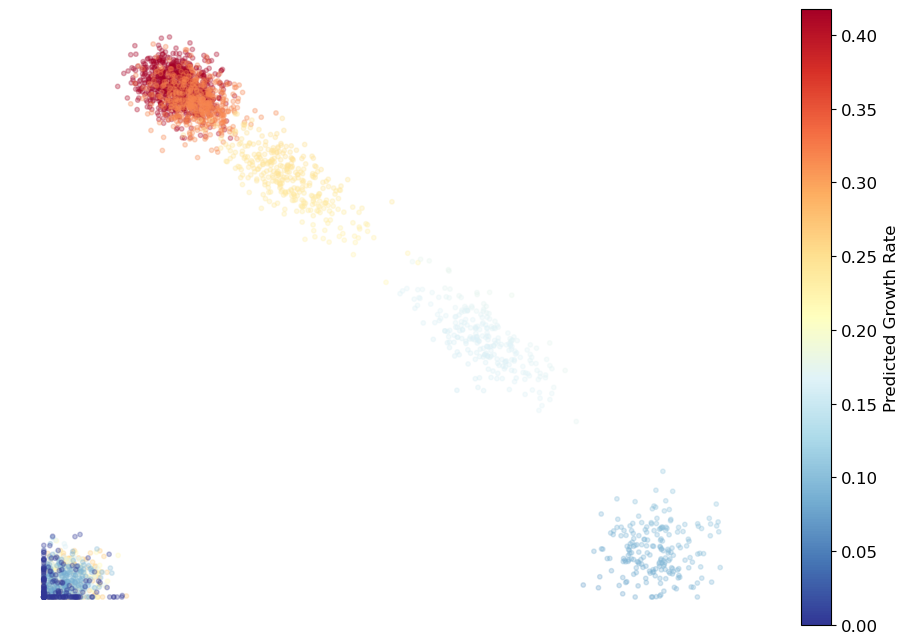

In [5]:
cb.pl.plot_growth(adata, dim_reduction = 'none', output_path= '/home/sjt/workspace2/CytoBridge_test-main_crufm/figures/g_values_plot.svg')

### **Data preprocessing and model training for h5ad**

1. Load gene expression matrix and sample time information.

In [1]:
import scanpy as sc
adata = sc.read_h5ad('/home/sjt/workspace2/CytoBridge_test-main_crufm/data/weinreb_unpropocessed.h5ad')
adata

AnnData object with n_obs × n_vars = 49116 × 25289
    obs: 'time_info', 'state_info', 'NeuMon_fate_bias', 'NeuMon_mask', 'progenitor_Ccr7_DC', 'progenitor_Mast', 'progenitor_Meg', 'progenitor_pDC', 'progenitor_Eos', 'progenitor_Lymphoid', 'progenitor_Erythroid', 'progenitor_Baso', 'progenitor_Neutrophil', 'progenitor_Monocyte', 'sp_500_idx', 'MLPClassifier_predicted_bias', 'growth_rate_raw', 'growth_rate_smooth'
    uns: 'available_map', 'clonal_time_points', 'data_des', 'progenitor_Monocyte_colors', 'state_info_colors', 'time_ordering'
    obsm: 'X_clone', 'X_emb', 'X_pca'

2. Specify the time key in `obs` and preprocess the data.

In [2]:
import CytoBridge as cb 
adata = cb.pp.preprocess(adata, time_key = 'time_info', dim_reduction = 'PCA', normalization = True, log1p = True, select_hvg = True)

Using 'time_info' as the time point identifier.
No time mapping provided. Generating automatic mapping.
Automatically generated time mapping: {'2': 0, '4': 1, '6': 2}
Numerical time points stored in `adata.obs['time_point_processed']`.
Normalizing total counts and applying log1p transformation.
Selecting top 2000 highly variable genes.
View of AnnData object with n_obs × n_vars = 49116 × 2000
    obs: 'time_info', 'state_info', 'NeuMon_fate_bias', 'NeuMon_mask', 'progenitor_Ccr7_DC', 'progenitor_Mast', 'progenitor_Meg', 'progenitor_pDC', 'progenitor_Eos', 'progenitor_Lymphoid', 'progenitor_Erythroid', 'progenitor_Baso', 'progenitor_Neutrophil', 'progenitor_Monocyte', 'sp_500_idx', 'MLPClassifier_predicted_bias', 'growth_rate_raw', 'growth_rate_smooth', 'time_point_processed'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'available_map', 'clonal_time_points', 'data_des', 'progenitor_Monocyte_colors', 'state_info_colors', 'time_ordering', 'log1p', 'hvg'


/home/ubuntu/anaconda3/envs/DeepRUOTv2/lib/python3.10/site-packages/scanpy/preprocessing/_pca/__init__.py:385: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


(49116, 50)
50
Created n_pc_adata with reduced dimension: 49116 samples × 50 dimensions
Original gene information stored in n_pc_adata.uns['original_gene_info']
Preprocessing recipe finished.
AnnData object with n_obs × n_vars = 49116 × 50
    obs: 'time_info', 'state_info', 'NeuMon_fate_bias', 'NeuMon_mask', 'progenitor_Ccr7_DC', 'progenitor_Mast', 'progenitor_Meg', 'progenitor_pDC', 'progenitor_Eos', 'progenitor_Lymphoid', 'progenitor_Erythroid', 'progenitor_Baso', 'progenitor_Neutrophil', 'progenitor_Monocyte', 'sp_500_idx', 'MLPClassifier_predicted_bias', 'growth_rate_raw', 'growth_rate_smooth', 'time_point_processed'
    var: 'dimension_type', 'explained_variance', 'cumulative_variance'
    uns: 'available_map', 'clonal_time_points', 'data_des', 'progenitor_Monocyte_colors', 'state_info_colors', 'time_ordering', 'log1p', 'hvg', 'pca', 'original_gene_info'
    obsm: 'X_clone', 'X_emb', 'X_pca', 'X_latent'


3. Display the processed time coordinates.

In [3]:
adata.obs['time_point_processed']

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
49111    2.0
49112    2.0
49113    2.0
49114    2.0
49115    2.0
Name: time_point_processed, Length: 49116, dtype: float64

4. Train the model using the `ruot_weinreb2` configuration.

In [8]:
adata = cb.tl.fit(adata, config = 'ruot_weinreb2', device = 'cuda')

Loading built-in config: 'ruot_weinreb2'

--- Starting Stage: Pretrain ---
  Mode: neural_ode, Epochs: 10, Use Score: False

====  Pretrain  ====
--------------------------------------------------
--------------------------------------------------
  No scheduler parameters configured - keeping learning rate constant
  velocity_net     grad=True
  growth_net       grad=True
  score_net        grad=False
  Optimizer parameters (shapes): [torch.Size([400, 51]), torch.Size([400]), torch.Size([400, 400]), torch.Size([400]), torch.Size([50, 400]), torch.Size([50]), torch.Size([400, 51]), torch.Size([400]), torch.Size([400, 400]), torch.Size([400]), torch.Size([1, 400]), torch.Size([1])]
  Stage 'Pretrain', Epoch 1/10, Loss: 523.3851
[INFO] Epoch   0 has a lower loss| all_loss 523.3851
[INFO] Epoch   1 has a lower loss| all_loss 428.3913
[INFO] Epoch   2 has a lower loss| all_loss 378.7752
[INFO] Epoch   7 has a lower loss| all_loss 346.4558
  Best model (loss=346.4558) saved → /home/sjt/work

Computing UOT plans...:   0%|          | 0/2 [00:00<?, ?it/s]

[Round-1 eps=5.000e-02] Failed: UserWarning: Numerical errors at iteration 901
Final entropic reg selected: 0.07100000000000001
Elbow rule selected reg_m: 1.125336
Time step 0 chunk 0 (per_time): reg=0.07100000000000001, reg_m=1.1253355826007645
Time step 0 chunk: scaled reg_m = 1.1253355826007645
Time step 0 chunk: scaled reg_m = 1.1253355826007645


Computing UOT plans...:  50%|█████     | 1/2 [00:49<00:49, 49.21s/it]

Time step 0 chunk: scaled reg_m = 1.1253355826007645
Final entropic reg selected: 0.051000000000000004
Elbow rule selected reg_m: 1.359356
Time step 1 chunk 0 (per_time): reg=0.051000000000000004, reg_m=1.3593563908785256
Time step 1 chunk: scaled reg_m = 1.3593563908785256
Time step 1 chunk: scaled reg_m = 1.3593563908785256
Time step 1 chunk: scaled reg_m = 1.3593563908785256
Time step 1 chunk: scaled reg_m = 1.3593563908785256
Time step 1 chunk: scaled reg_m = 1.3593563908785256
Time step 1 chunk: scaled reg_m = 1.3593563908785256
Time step 1 chunk: scaled reg_m = 1.3593563908785256
Time step 1 chunk: scaled reg_m = 1.3593563908785256


Flow matching: 100%|██████████| 30/30 [00:03<00:00,  9.77it/s]


  Best model (loss=0.6366) saved → /home/sjt/workspace2/CytoBridge_test-main_crufm/results/experiment_weinreb1/Train_FM/best_model.pth

--- Starting Stage: Finetune ---
  Mode: neural_ode, Epochs: 5, Use Score: False

====  Finetune  ====
--------------------------------------------------
--------------------------------------------------
  No scheduler parameters configured - keeping learning rate constant
  velocity_net     grad=True
  growth_net       grad=True
  score_net        grad=False
  Optimizer parameters (shapes): [torch.Size([400, 51]), torch.Size([400]), torch.Size([400, 400]), torch.Size([400]), torch.Size([50, 400]), torch.Size([50]), torch.Size([400, 51]), torch.Size([400]), torch.Size([400, 400]), torch.Size([400]), torch.Size([1, 400]), torch.Size([1])]
  Stage 'Finetune', Epoch 1/5, Loss: 411.4681
[INFO] Epoch   0 has a lower loss| all_loss 411.4681
[INFO] Epoch   1 has a lower loss| all_loss 408.1792
[INFO] Epoch   2 has a lower loss| all_loss 375.0804
[INFO] Epoch

5. Display the latent space representation of the data.

In [9]:
adata.obsm['X_latent']

array([[-3.6428378 ,  2.436678  , -2.9170516 , ..., -0.611192  ,
        -0.18371896, -0.6149843 ],
       [-4.9441824 , -4.6696796 ,  4.238613  , ..., -0.21018225,
         0.48122397,  0.59066844],
       [ 4.527339  , -0.30856872, -2.3583496 , ...,  0.56100917,
         0.2844135 , -0.20859115],
       ...,
       [ 2.555032  ,  3.0457778 , -0.16068852, ...,  1.0851277 ,
        -1.1630424 ,  0.11137625],
       [10.0182    , -6.800205  , -3.480523  , ...,  0.12070175,
        -0.5067553 , -1.1749583 ],
       [-3.3989573 ,  2.264593  , -3.548077  , ..., -0.97040135,
         0.39139208, -0.32629538]], dtype=float32)

6. Display the updated AnnData object.

In [10]:
adata

AnnData object with n_obs × n_vars = 49116 × 50
    obs: 'time_info', 'state_info', 'NeuMon_fate_bias', 'NeuMon_mask', 'progenitor_Ccr7_DC', 'progenitor_Mast', 'progenitor_Meg', 'progenitor_pDC', 'progenitor_Eos', 'progenitor_Lymphoid', 'progenitor_Erythroid', 'progenitor_Baso', 'progenitor_Neutrophil', 'progenitor_Monocyte', 'sp_500_idx', 'MLPClassifier_predicted_bias', 'growth_rate_raw', 'growth_rate_smooth', 'time_point_processed'
    var: 'dimension_type', 'explained_variance', 'cumulative_variance'
    uns: 'available_map', 'clonal_time_points', 'data_des', 'progenitor_Monocyte_colors', 'state_info_colors', 'time_ordering', 'log1p', 'hvg', 'pca', 'original_gene_info', 'all_model'
    obsm: 'X_clone', 'X_emb', 'X_pca', 'X_latent', 'velocity_latent', 'growth_rate', 'score_latent'

7. Plot the growth rate using UMAP dimensionality reduction.

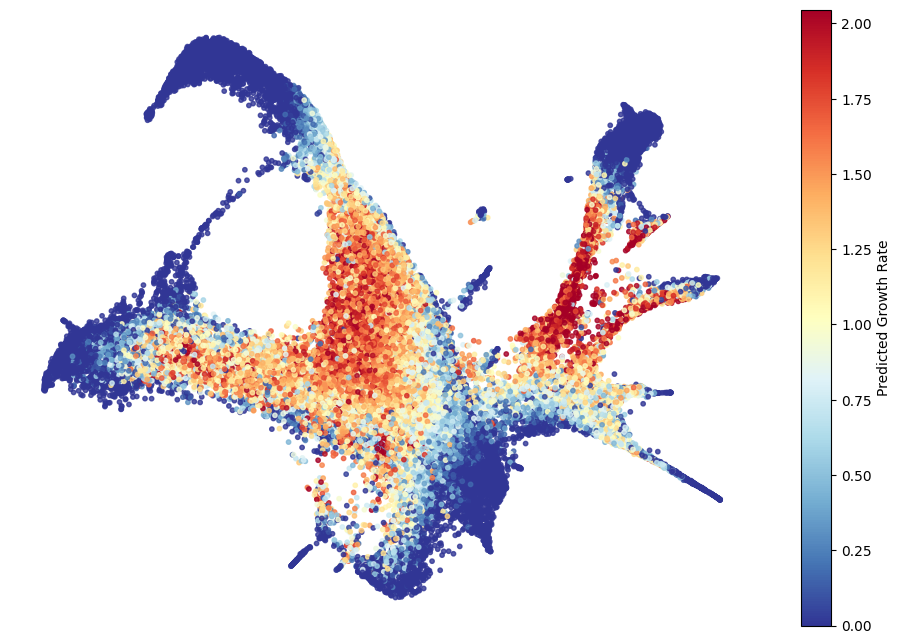

In [ ]:
cb.pl.plot_growth(adata, dim_reduction = 'umap', output_path = 'g_values_plot.svg')